In [1]:
library(tidyverse)
library(modelr)
options(na.action = na.warn)

library(nycflights13)
library(lubridate)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.1     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



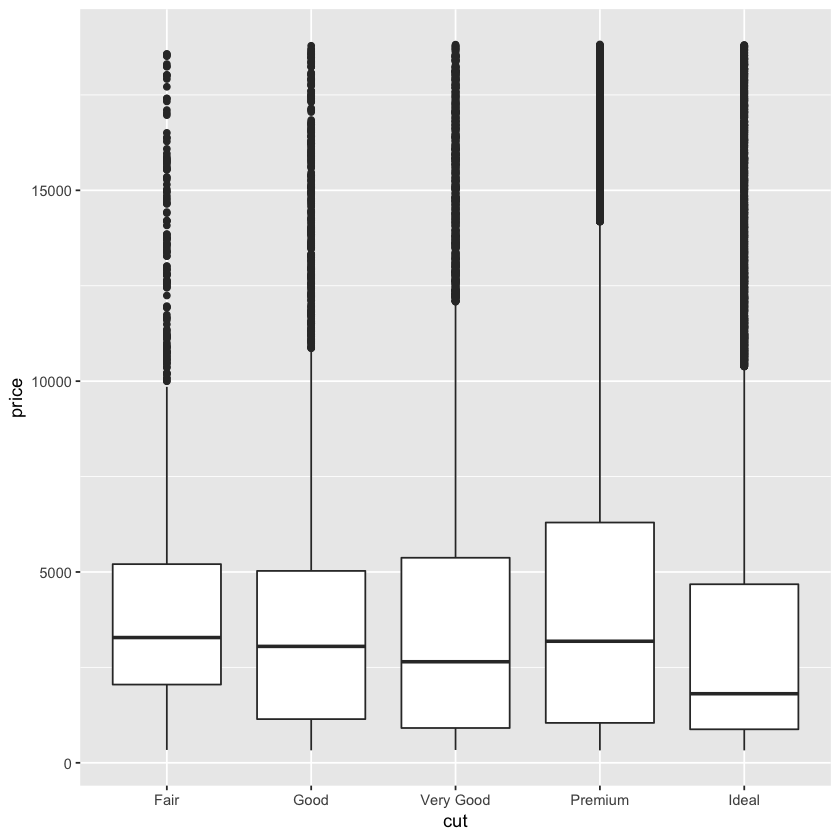

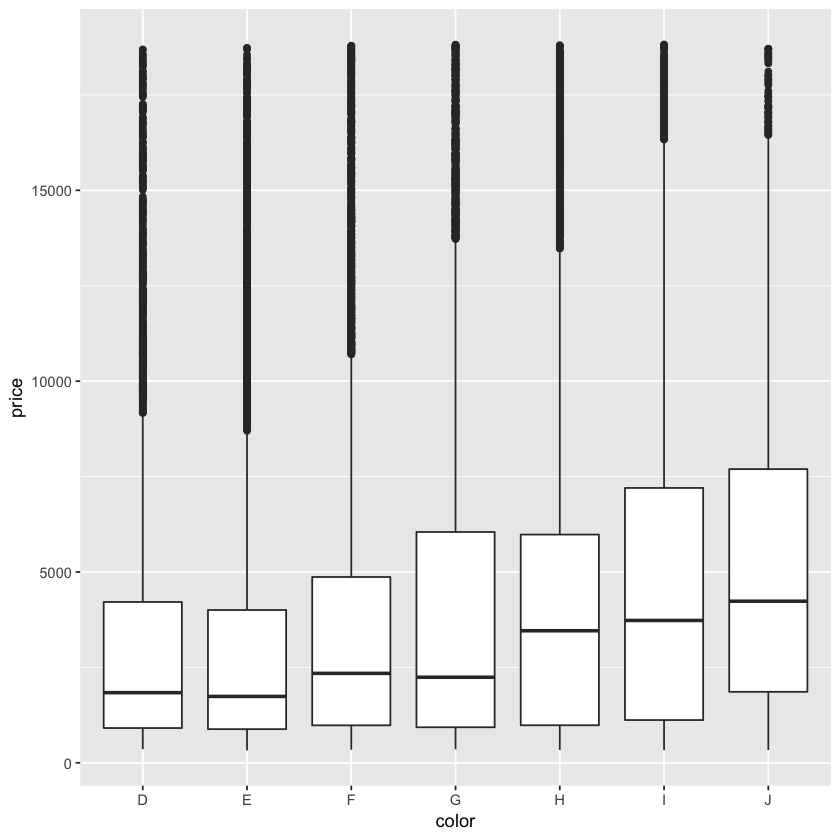

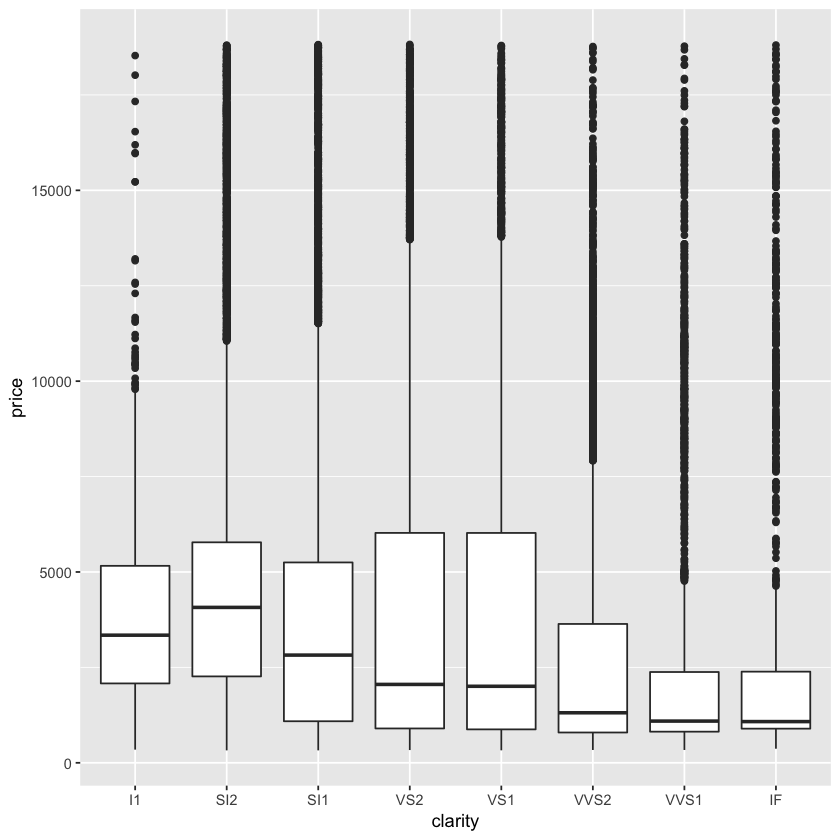

In [2]:
ggplot(diamonds, aes(cut, price)) + geom_boxplot()
ggplot(diamonds, aes(color, price)) + geom_boxplot()
ggplot(diamonds, aes(clarity, price)) + geom_boxplot()

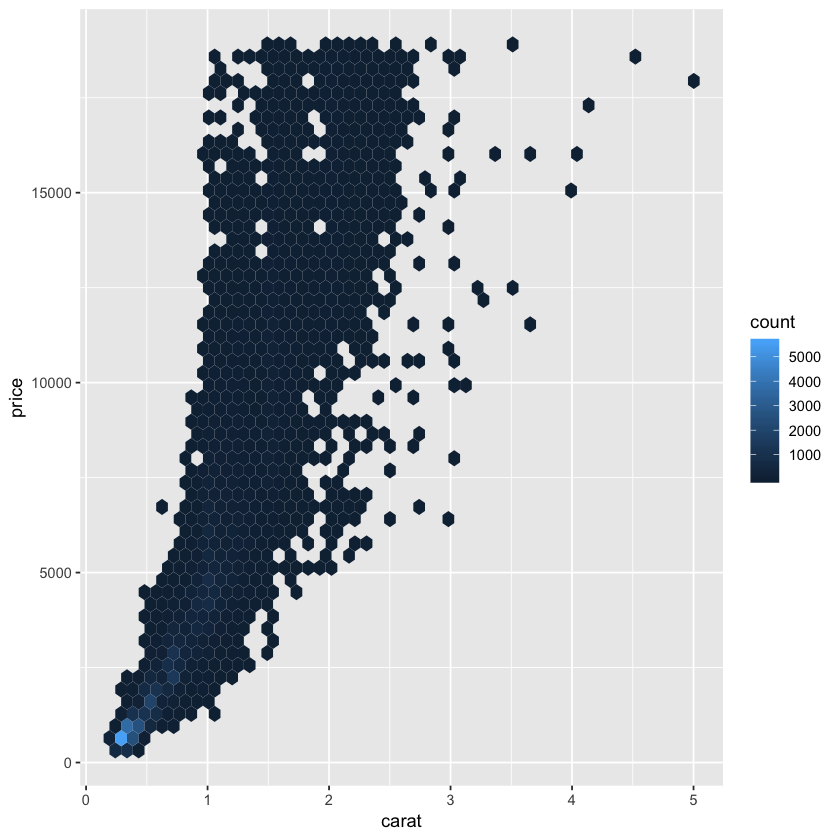

In [3]:
ggplot(diamonds, aes(carat, price)) + 
  geom_hex(bins = 50)

In [4]:
diamonds2 <- diamonds %>% 
  filter(carat <= 2.5) %>% 
  mutate(lprice = log2(price), lcarat = log2(carat))
head(diamonds); head(diamonds2)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


carat,cut,color,clarity,depth,table,price,x,y,z,lprice,lcarat
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,8.348728,-2.120294
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,8.348728,-2.251539
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,8.353147,-2.120294
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,8.383704,-1.785875
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,8.388017,-1.689660
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48,8.392317,-2.058894


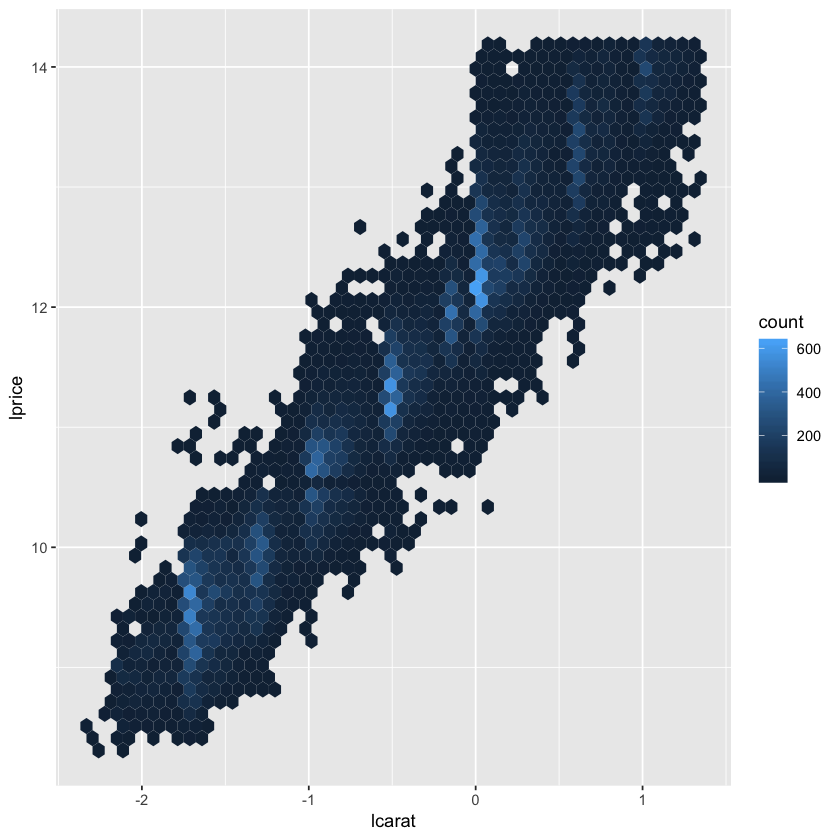

In [5]:
ggplot(diamonds2, aes(lcarat, lprice)) + 
  geom_hex(bins = 50)

In [6]:
mod_diamond <- lm(lprice ~ lcarat, data = diamonds2)

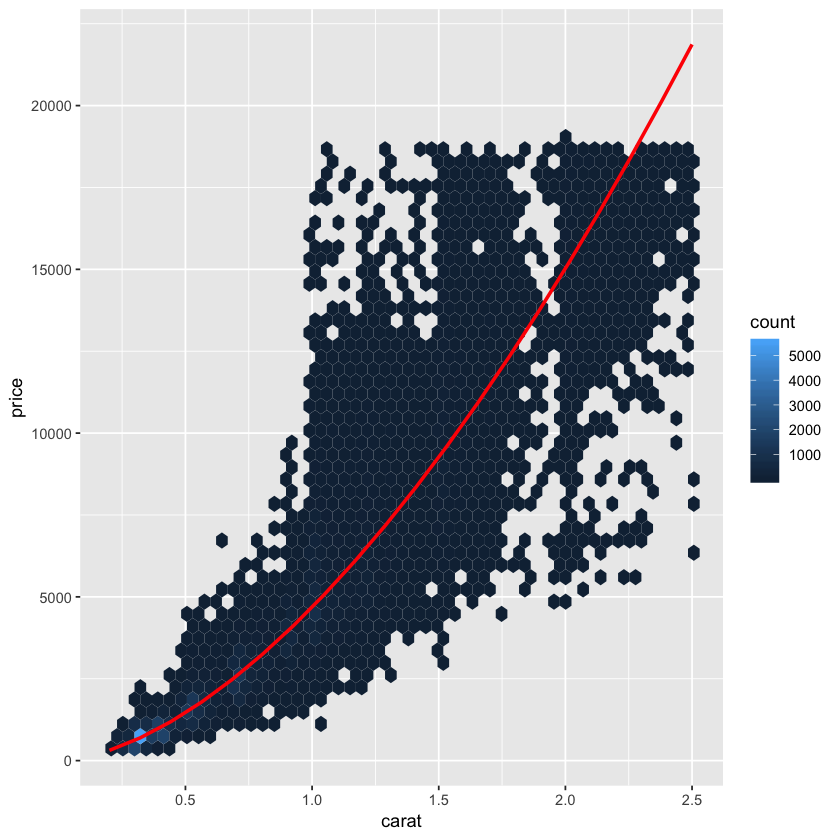

In [7]:
grid <- diamonds2 %>% 
  data_grid(carat = seq_range(carat, 20)) %>% 
  mutate(lcarat = log2(carat)) %>% 
  add_predictions(mod_diamond, "lprice") %>% 
  mutate(price = 2 ^ lprice)

ggplot(diamonds2, aes(carat, price)) + 
  geom_hex(bins = 50) + 
  geom_line(data = grid, colour = "red", size = 1)

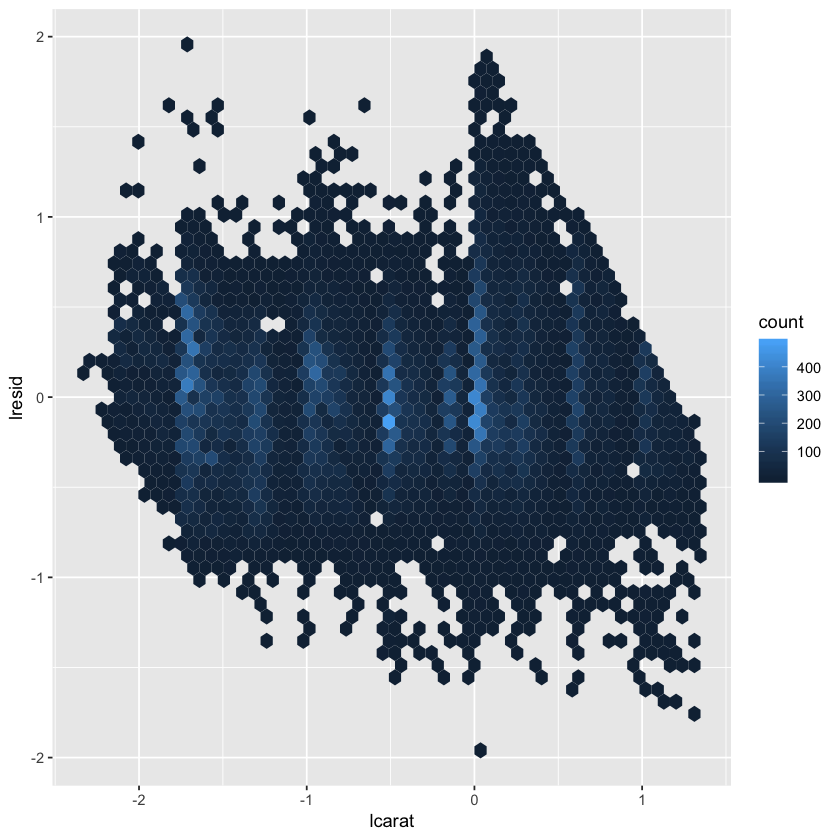

In [8]:
diamonds2 <- diamonds2 %>% 
  add_residuals(mod_diamond, "lresid")

ggplot(diamonds2, aes(lcarat, lresid)) + 
  geom_hex(bins = 50)

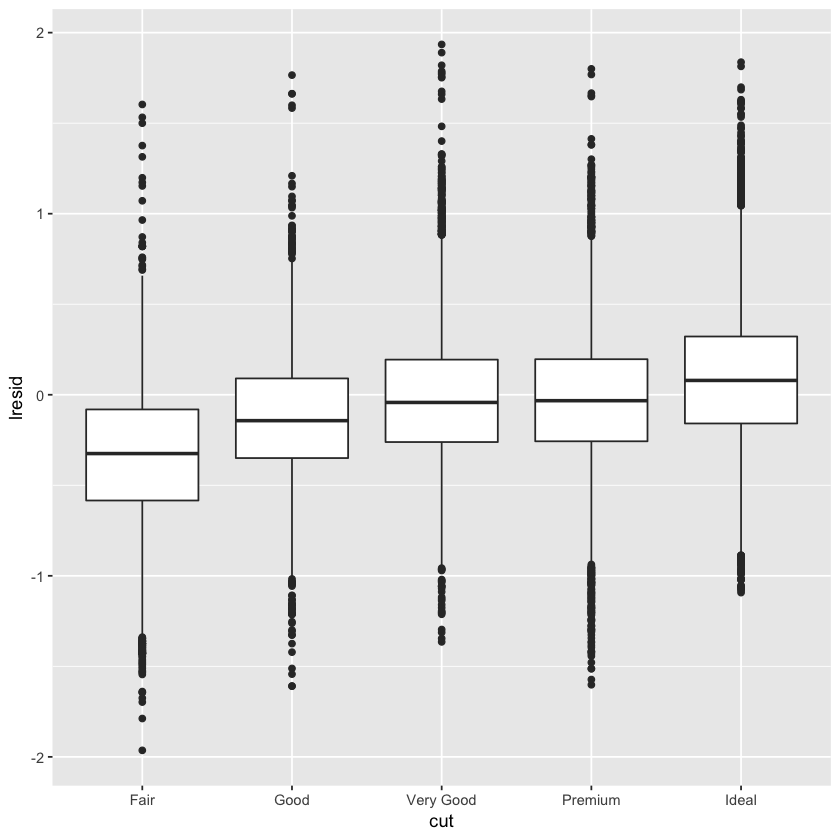

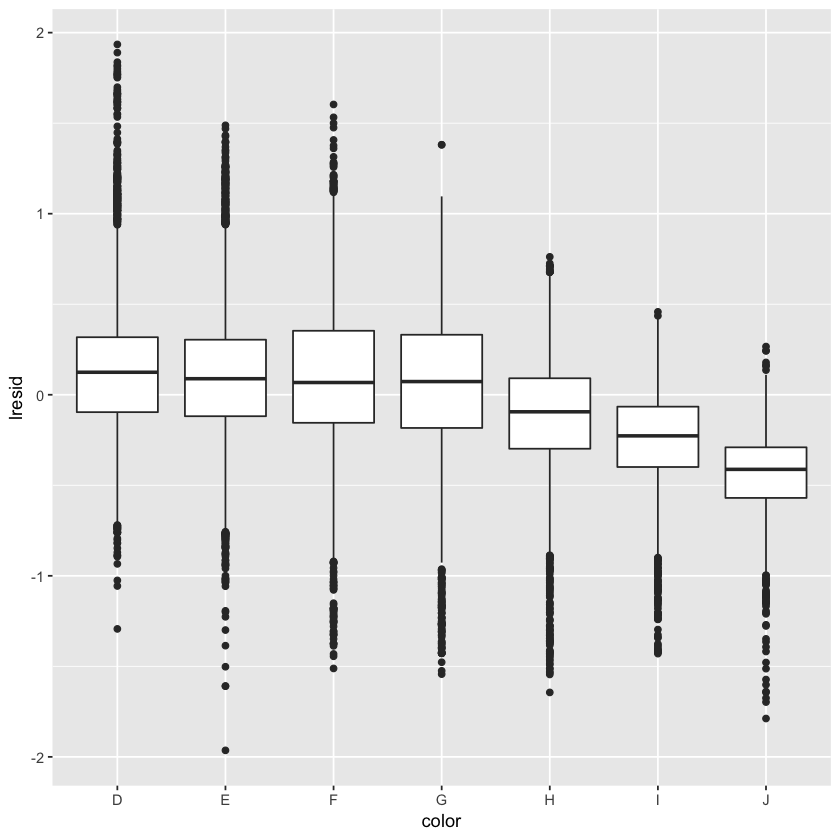

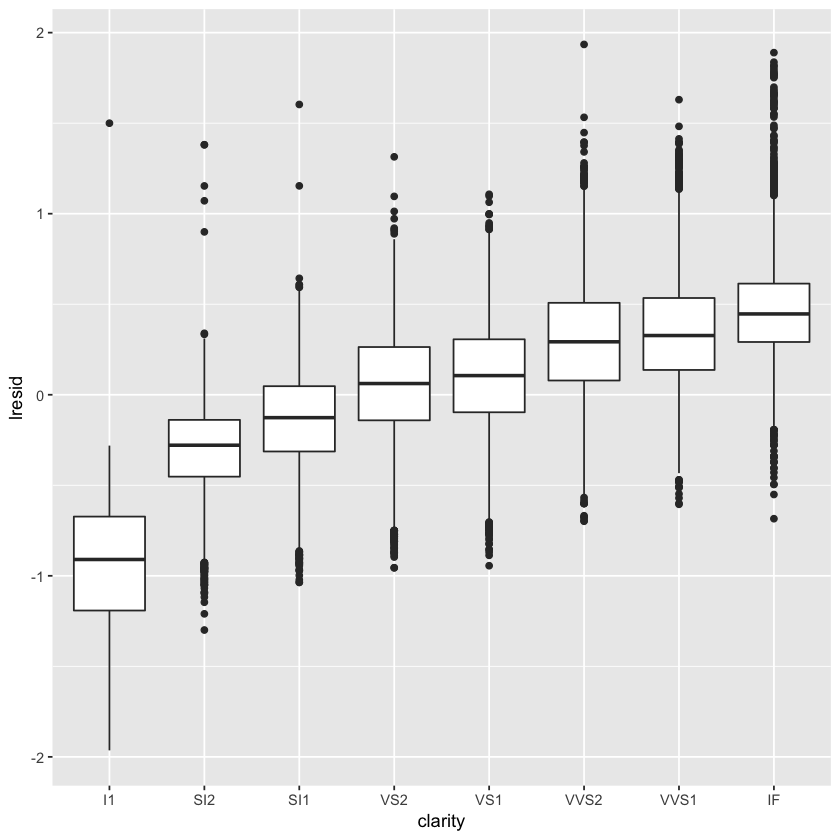

In [9]:
ggplot(diamonds2, aes(cut, lresid)) + geom_boxplot()
ggplot(diamonds2, aes(color, lresid)) + geom_boxplot()
ggplot(diamonds2, aes(clarity, lresid)) + geom_boxplot()

In [10]:
mod_diamond2 <- lm(lprice ~ lcarat + color + cut + clarity, data = diamonds2)

cut,lcarat,color,clarity,pred
Fair,-0.5145732,G,VS2,11.20557
Good,-0.5145732,G,VS2,11.32050
Very Good,-0.5145732,G,VS2,11.37396
Premium,-0.5145732,G,VS2,11.40627
Ideal,-0.5145732,G,VS2,11.43759


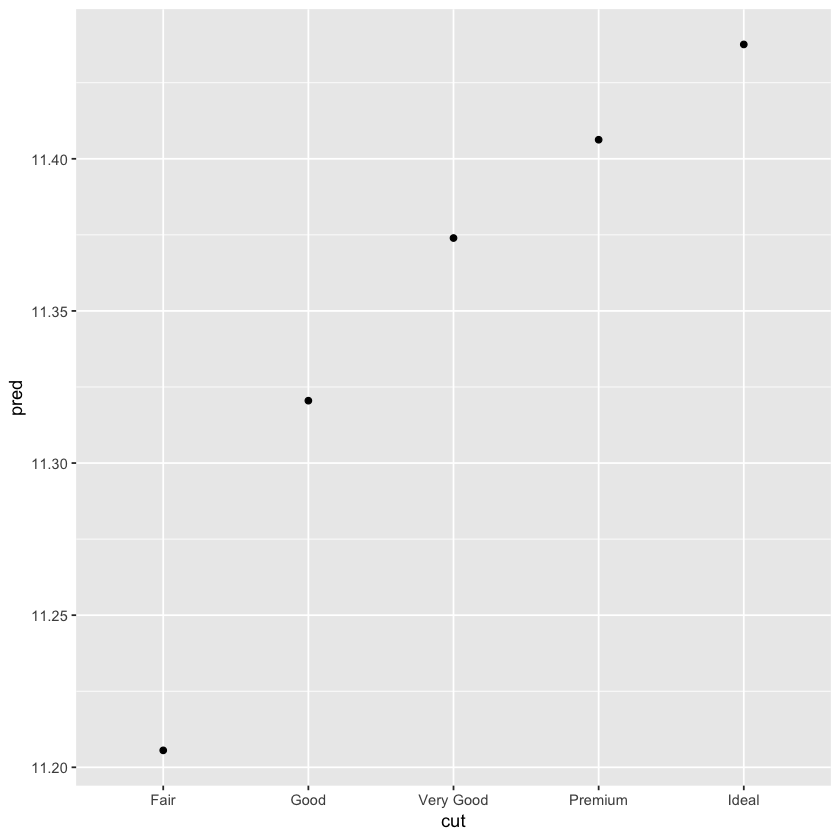

In [12]:
grid <- diamonds2 %>% 
  data_grid(cut, .model = mod_diamond2) %>% 
  add_predictions(mod_diamond2)
grid
ggplot(grid, aes(cut, pred)) + 
  geom_point()

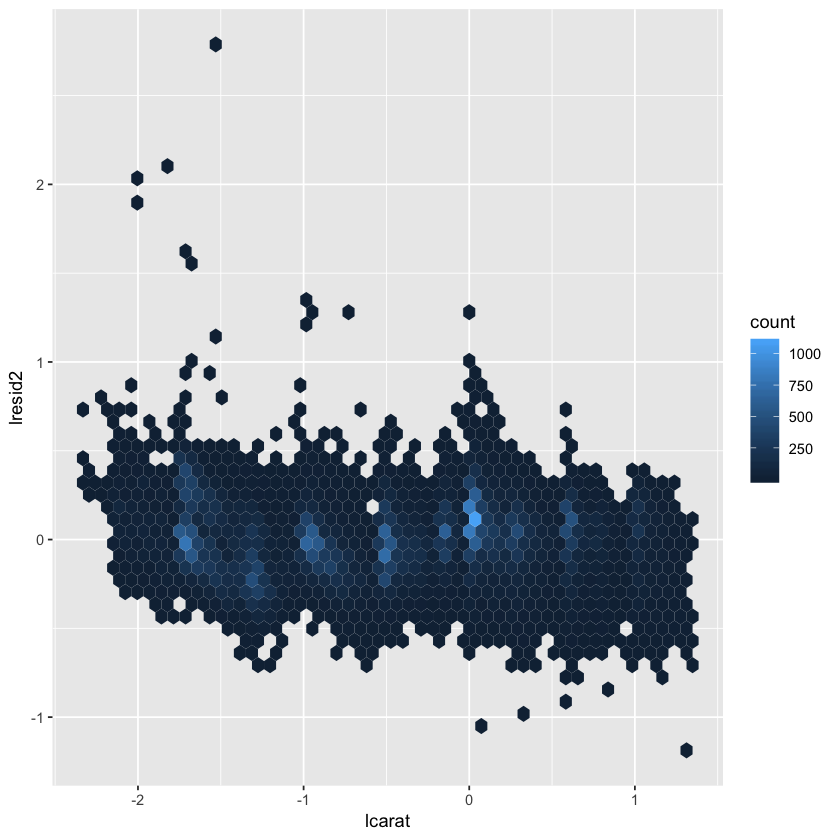

In [13]:
diamonds2 <- diamonds2 %>% 
  add_residuals(mod_diamond2, "lresid2")

ggplot(diamonds2, aes(lcarat, lresid2)) + 
  geom_hex(bins = 50)

In [14]:
diamonds2 %>% 
  filter(abs(lresid2) > 1) %>% 
  add_predictions(mod_diamond2) %>% 
  mutate(pred = round(2 ^ pred)) %>% 
  select(price, pred, carat:table, x:z) %>% 
  arrange(price)

price,pred,carat,cut,color,clarity,depth,table,x,y,z
1013,264,0.25,Fair,F,SI2,54.4,64,4.30,4.23,2.32
1186,284,0.25,Premium,G,SI2,59.0,60,5.33,5.28,3.12
1186,284,0.25,Premium,G,SI2,58.8,60,5.33,5.28,3.12
1262,2644,1.03,Fair,E,I1,78.2,54,5.72,5.59,4.42
1415,639,0.35,Fair,G,VS2,65.9,54,5.57,5.53,3.66
1415,639,0.35,Fair,G,VS2,65.9,54,5.57,5.53,3.66
1715,576,0.32,Fair,F,VS2,59.6,60,4.42,4.34,2.61
1776,412,0.29,Fair,F,SI1,55.8,60,4.48,4.41,2.48
2160,314,0.34,Fair,F,I1,55.8,62,4.72,4.60,2.60
2366,774,0.30,Very Good,D,VVS2,60.6,58,4.33,4.35,2.63


In [15]:
diamonds2 <- diamonds %>%
  filter(carat <= 2.5) %>%
  mutate(
    lprice = log2(price),
    lcarat = log2(carat)
  )

mod_diamond2 <- lm(lprice ~ lcarat + color + cut + clarity, data = diamonds2)

diamonds2 <- add_residuals(diamonds2, mod_diamond2, "lresid2")

In [16]:
mod_log <- lm(log2(price) ~ log2(carat), data = diamonds)
mod_log


Call:
lm(formula = log2(price) ~ log2(carat), data = diamonds)

Coefficients:
(Intercept)  log2(carat)  
     12.189        1.676  


In [21]:
tibble(carat = seq(0.25, 5, by = 0.25)) %>%
  add_predictions(mod_log)

carat,pred
0.25,8.837207
0.50,10.513024
0.75,11.493314
1.00,12.188841
1.25,12.728333
1.50,13.169131
1.75,13.541820
2.00,13.864658
2.25,14.149421
2.50,14.404150


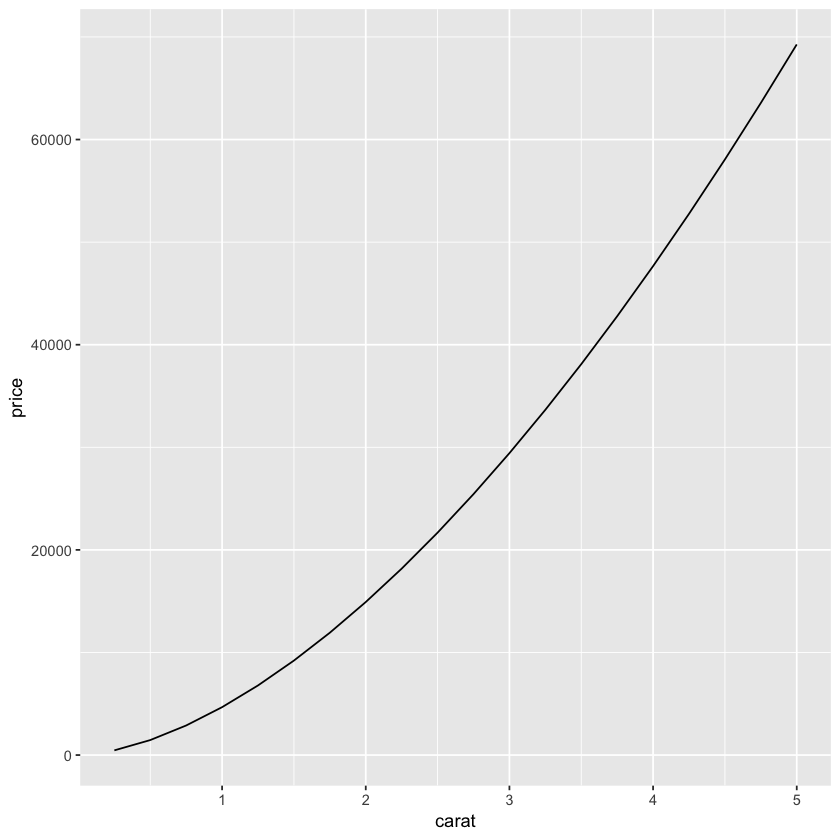

In [22]:
tibble(carat = seq(0.25, 5, by = 0.25)) %>%
  add_predictions(mod_log) %>%
  ggplot(aes(x = carat, y = 2^pred)) +
  geom_line() +
  labs(x = "carat", y = "price")

In [23]:
2^coef(mod_log)[2]

log2(carat) 
   3.195002

In [24]:
2^(predict(mod_log, newdata = tibble(carat = 2)) -
  predict(mod_log, newdata = tibble(carat = 1)))

1 
3.195002

In [25]:
2^(predict(mod_log, newdata = tibble(carat = 4)) -
  predict(mod_log, newdata = tibble(carat = 2)))

1 
3.195002

In [ ]:
2^(predict(mod_log, newdata = tibble(carat = 1)) -
  predict(mod_log, newdata = tibble(carat = 0.5)))

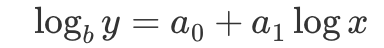

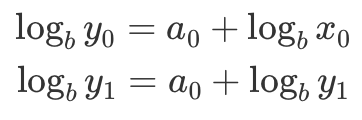

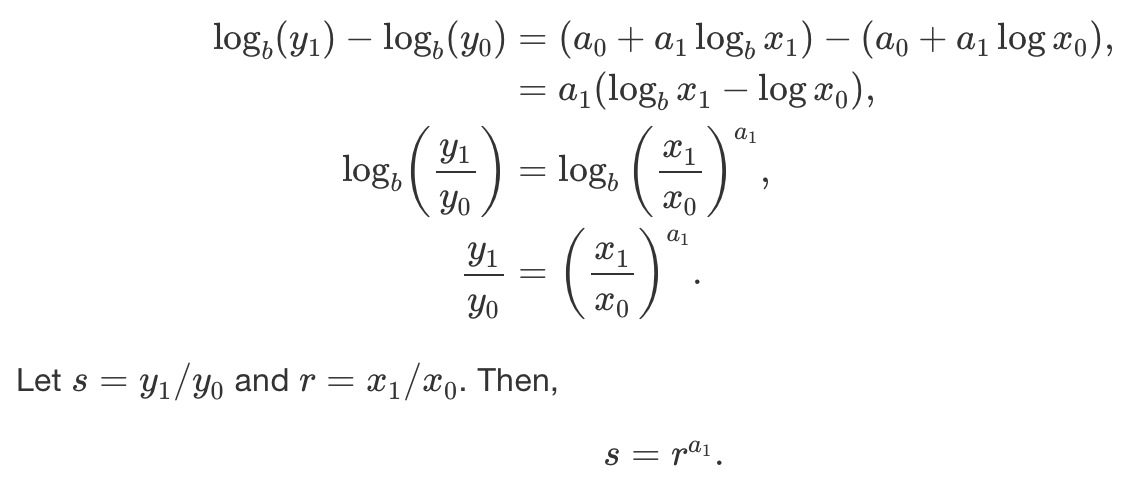

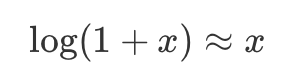

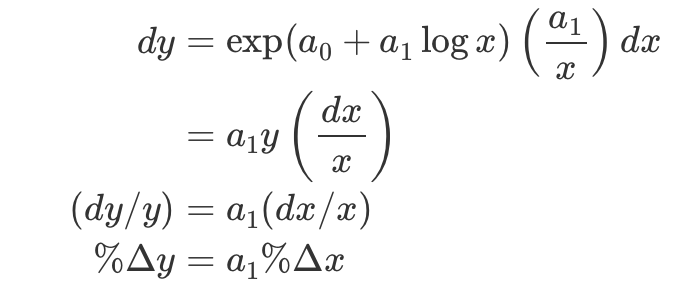

In [26]:
diamonds2 %>%
  filter(abs(lresid2) > 1) %>%
  add_predictions(mod_diamond2) %>%
  mutate(pred = round(2^pred)) %>%
  select(price, pred, carat:table, x:z) %>%
  arrange(price)

price,pred,carat,cut,color,clarity,depth,table,x,y,z
1013,264,0.25,Fair,F,SI2,54.4,64,4.30,4.23,2.32
1186,284,0.25,Premium,G,SI2,59.0,60,5.33,5.28,3.12
1186,284,0.25,Premium,G,SI2,58.8,60,5.33,5.28,3.12
1262,2644,1.03,Fair,E,I1,78.2,54,5.72,5.59,4.42
1415,639,0.35,Fair,G,VS2,65.9,54,5.57,5.53,3.66
1415,639,0.35,Fair,G,VS2,65.9,54,5.57,5.53,3.66
1715,576,0.32,Fair,F,VS2,59.6,60,4.42,4.34,2.61
1776,412,0.29,Fair,F,SI1,55.8,60,4.48,4.41,2.48
2160,314,0.34,Fair,F,I1,55.8,62,4.72,4.60,2.60
2366,774,0.30,Very Good,D,VVS2,60.6,58,4.33,4.35,2.63


In [ ]:
I did not see anything too unusual. Do you?

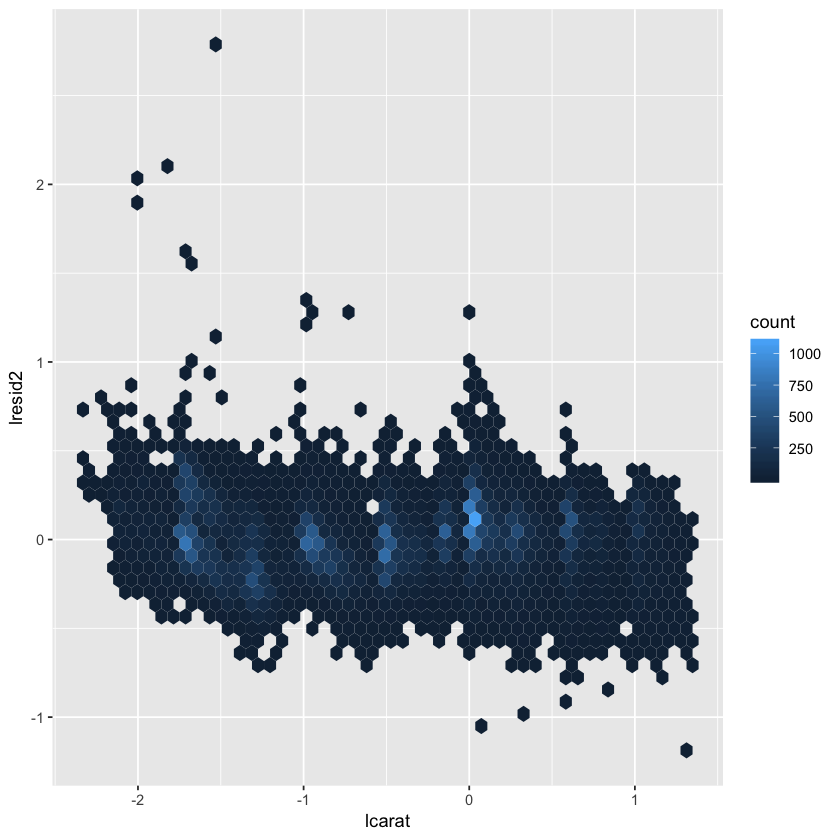

In [28]:
ggplot(diamonds2, aes(lcarat, lresid2)) +
  geom_hex(bins = 50)

In [27]:
lresid2_summary <- summarise(diamonds2,
  rmse = sqrt(mean(lresid2^2)),
  mae = mean(abs(lresid2)),
  p025 = quantile(lresid2, 0.025),
  p975 = quantile(lresid2, 0.975)
)
lresid2_summary

rmse,mae,p025,p975
0.191524,0.1491158,-0.3692446,0.3844299


In [ ]:
daily <- flights %>% 
  mutate(date = make_date(year, month, day)) %>% 
  group_by(date) %>% 
  summarise(n = n())
daily
ggplot(daily, aes(date, n)) + 
  geom_line()

In [ ]:
daily <- daily %>% 
  mutate(wday = wday(date, label = TRUE))
ggplot(daily, aes(wday, n)) + 
  geom_boxplot()

In [ ]:
mod <- lm(n ~ wday, data = daily)

grid <- daily %>% 
  data_grid(wday) %>% 
  add_predictions(mod, "n")

ggplot(daily, aes(wday, n)) + 
  geom_boxplot() +
  geom_point(data = grid, colour = "red", size = 4)

In [ ]:
daily <- daily %>% 
  add_residuals(mod)
daily %>% 
  ggplot(aes(date, resid)) + 
  geom_ref_line(h = 0) + 
  geom_line()

In [ ]:
ggplot(daily, aes(date, resid, colour = wday)) + 
  geom_ref_line(h = 0) + 
  geom_line()

In [ ]:
daily %>% 
  filter(resid < -100)

In [ ]:
daily %>% 
  ggplot(aes(date, resid)) + 
  geom_ref_line(h = 0) + 
  geom_line(colour = "grey50") + 
  geom_smooth(se = FALSE, span = 0.20)

In [ ]:
daily %>% 
  filter(wday == "Sat") %>% 
  ggplot(aes(date, n)) + 
    geom_point() + 
    geom_line() +
    scale_x_date(NULL, date_breaks = "1 month", date_labels = "%b")

In [ ]:
term <- function(date) {
  cut(date, 
    breaks = ymd(20130101, 20130605, 20130825, 20140101),
    labels = c("spring", "summer", "fall") 
  )
}

daily <- daily %>% 
  mutate(term = term(date)) 

daily %>% 
  filter(wday == "Sat") %>% 
  ggplot(aes(date, n, colour = term)) +
  geom_point(alpha = 1/3) + 
  geom_line() +
  scale_x_date(NULL, date_breaks = "1 month", date_labels = "%b")

In [ ]:
daily %>% 
  ggplot(aes(wday, n, colour = term)) +
    geom_boxplot()

In [ ]:
mod1 <- lm(n ~ wday, data = daily)
mod2 <- lm(n ~ wday * term, data = daily)

daily %>% 
  gather_residuals(without_term = mod1, with_term = mod2) %>% 
  ggplot(aes(date, resid, colour = model)) +
    geom_line(alpha = 0.75)

In [ ]:
grid <- daily %>% 
  data_grid(wday, term) %>% 
  add_predictions(mod2, "n")

ggplot(daily, aes(wday, n)) +
  geom_boxplot() + 
  geom_point(data = grid, colour = "red") + 
  facet_wrap(~ term)

In [ ]:
mod3 <- MASS::rlm(n ~ wday * term, data = daily)

daily %>% 
  add_residuals(mod3, "resid") %>% 
  ggplot(aes(date, resid)) + 
  geom_hline(yintercept = 0, size = 2, colour = "white") + 
  geom_line()

In [ ]:
compute_vars <- function(data) {
  data %>% 
    mutate(
      term = term(date), 
      wday = wday(date, label = TRUE)
    )
}

In [ ]:
wday2 <- function(x) wday(x, label = TRUE)
mod3 <- lm(n ~ wday2(date) * term(date), data = daily)

In [ ]:
library(splines)
mod <- MASS::rlm(n ~ wday * ns(date, 5), data = daily)

daily %>% 
  data_grid(wday, date = seq_range(date, n = 13)) %>% 
  add_predictions(mod) %>% 
  ggplot(aes(date, pred, colour = wday)) + 
    geom_line() +
    geom_point()

In [ ]:
daily %>% 
  top_n(3, resid)